# Stock market Risk Analysis for Tesla Stock Prices

The Visualisations in this project have been made using the Plotly package which may not be visible In github repository, To see those plots or the complete program with visualisation You can click on the link in README.md file.

In [19]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
import plotly
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot

In [20]:
from plotly.offline import init_notebook_mode, iplot, plot, download_plotlyjs
init_notebook_mode(connected = True)

In [4]:
import pandas_datareader.data as web

In [5]:
from datetime import datetime

In [8]:
# Setting the Start and End date for Stock Market Analysis
# Data of past 1 year

end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [9]:
# Importing Tesla Motors Stock Prices

tesla = web.DataReader('TSLA','yahoo',start,end)

In [10]:
tesla.to_csv('tesla.csv')

In [11]:
tesla = pd.read_csv('tesla.csv')

In [12]:
tesla.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2019-07-29,235.940002,226.029999,227.089996,235.770004,9273300,235.770004
1,2019-07-30,243.360001,232.179993,232.899994,242.259995,8109000,242.259995
2,2019-07-31,246.679993,236.649994,243.000000,241.610001,9178200,241.610001
3,2019-08-01,244.509995,231.770004,242.649994,233.850006,8259500,233.850006
4,2019-08-02,236.270004,229.229996,231.350006,234.339996,6136500,234.339996


In [22]:
tesla['Date'] = pd.to_datetime(tesla['Date'])

In [23]:
# Checking if there are any null values or not

tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       252 non-null    datetime64[ns]
 1   High       252 non-null    float64       
 2   Low        252 non-null    float64       
 3   Open       252 non-null    float64       
 4   Close      252 non-null    float64       
 5   Volume     252 non-null    int64         
 6   Adj Close  252 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.9 KB


In [24]:
tesla.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,599.650913,566.051350,582.835993,583.777525,1.360922e+07,583.777525
std,359.223890,331.386916,346.710901,345.814629,8.353960e+06,345.814629
min,215.020004,211.000000,213.600006,211.399994,2.465600e+06,211.399994
25%,313.592506,294.382492,298.207497,309.902496,7.558125e+06,309.902496
50%,514.975006,483.165009,499.175003,503.565002,1.195740e+07,503.565002
75%,818.497498,773.289978,794.237518,799.354980,1.726020e+07,799.354980
max,1794.989990,1562.000000,1678.949951,1643.000000,6.093880e+07,1643.000000


In [25]:
# Plotting Adjusted Closing price for Tesla Motors Stock
dt1 = [{'x' : tesla['Date'], 'y' : tesla['Adj Close']}]
fig2 = go.Figure(data = dt1, layout = go.Layout(title = "Adjusted Closing price for TESLA Motors Stock", xaxis = dict(title = 'Date'), yaxis = dict(title = 'Adj Close')))
iplot(fig2)

In [26]:
# Plotting Volume for Tesla Motors Stock

In [27]:
dt2 = [{'x' : tesla['Date'], 'y' : tesla['Volume']}]
fig3 = go.Figure(data = dt2, layout = go.Layout(title = "Volume for TESLA Motors Stock", xaxis = dict(title = 'Date'), yaxis = dict(title = 'Volume')))
iplot(fig3)

In [28]:
# Plotting Closing price for Tesla Motors Stock
dt3= [{'x' : tesla['Date'], 'y' : tesla['Close']}]
fig4 = go.Figure(data = dt3, layout = go.Layout(title = "Closing price for TESLA Motors Stock", xaxis = dict(title = 'Date'), yaxis = dict(title = 'Closing price')))
iplot(fig4)

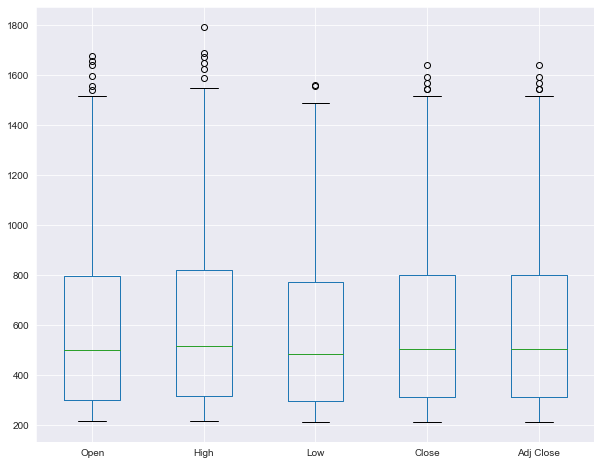

In [29]:
tesla[['Open','High','Low','Close','Adj Close']].plot(kind = 'box',figsize = (10,8))
plt.show()

In [30]:
df = [{'x' : tesla['Date'], 'y' : tesla['Adj Close']}]
fig0 = go.Figure(data = df, layout = go.Layout(title = "Tesla's Stock Prices", xaxis = dict(title = 'Date'), yaxis = dict(title = 'Price')))
iplot(fig0)

#### Plotting Daily returns as a function of Percent change in Adjusted Close value


In [33]:
tesla['Daily Return'] = tesla['Adj Close'].pct_change()

In [34]:
data = [{'x' : tesla['Date'], 'y' : tesla['Daily Return']}]
fig1 = go.Figure(data = data, layout = go.Layout(title = "Daily Returns of Adjusted Close value", xaxis = dict(title = 'Date'), yaxis = dict(title = 'Daily Returns')))
iplot(fig1)

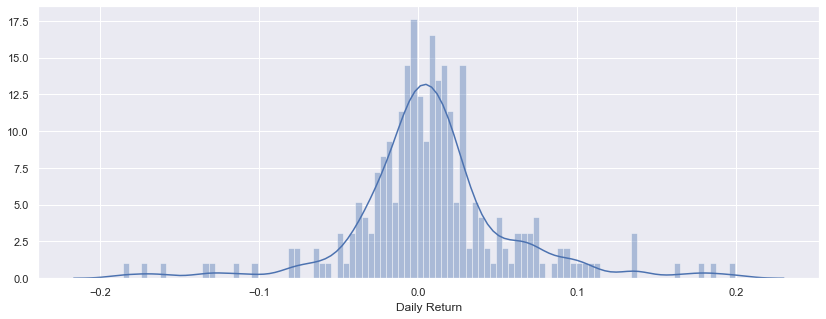

In [35]:
# Plotting the average daily returns of the stock
sns.set(rc={'figure.figsize':(14,5)})
sns.distplot(tesla['Daily Return'].dropna(),bins=100)
plt.show()

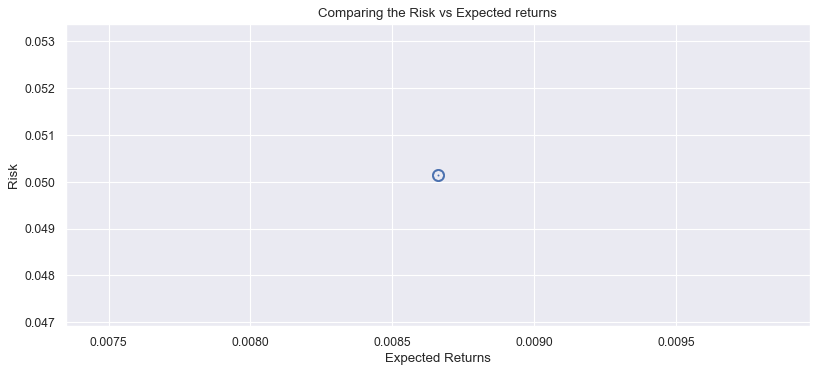

In [36]:
# Risk Analysis: Comparing the Risk vs Expected returns

returns = tesla['Daily Return'].dropna()

area = np.pi*1
plt.figure(figsize=(12, 5), dpi=80)
plt.scatter(returns.mean(),returns.std(),s=area,linewidth=10)
plt.title('Comparing the Risk vs Expected returns')
plt.xlabel('Expected Returns')
plt.ylabel('Risk')
plt.show()

In [37]:
# Using Quantiles and the Bootstrap Method to calculate the numerical risk of the stock

tesla['Daily Return'].quantile(0.05)

-0.0624515117863243

In [38]:
days = 365

dx = 1/days

mu = returns.mean()

sigma = returns.std()

In [39]:
# Defining the Monte Carlo Simulation Function

def monte_carlo_sim(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu*dx,scale=sigma*np.sqrt(dx))
        
        drift[x] = mu * dx
        
        price[x] = price[x-1] + (price[x-1]* (drift[x] + shock[x]))
        
    return price

In [40]:
tesla.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Daily Return
0,2019-07-29,235.940002,226.029999,227.089996,235.770004,9273300,235.770004,NaN
1,2019-07-30,243.360001,232.179993,232.899994,242.259995,8109000,242.259995,0.027527
2,2019-07-31,246.679993,236.649994,243.000000,241.610001,9178200,241.610001,-0.002683
3,2019-08-01,244.509995,231.770004,242.649994,233.850006,8259500,233.850006,-0.032118
4,2019-08-02,236.270004,229.229996,231.350006,234.339996,6136500,234.339996,0.002095


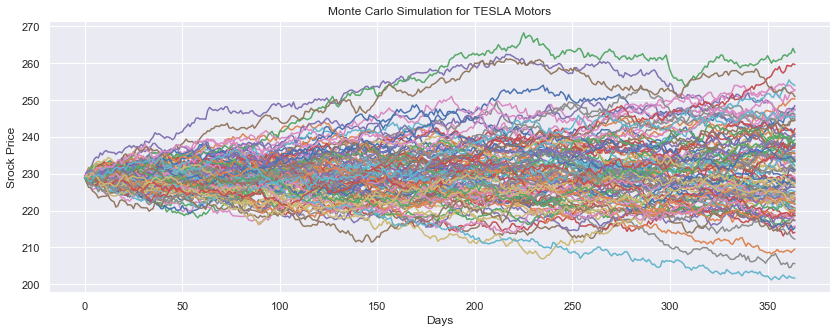

In [41]:
# Running the Monte Carlo simulation a hundred times

start_price = 229.012569

for run in range(100):
    plt.plot(monte_carlo_sim(start_price,days,mu,sigma))


plt.title('Monte Carlo Simulation for TESLA Motors')
plt.xlabel('Days')
plt.ylabel('Srock Price')
plt.show()

In [42]:
# Analysing the Monte Carlo Simulation for 10,000 simulations

runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = monte_carlo_sim(start_price,days,mu,sigma)[days-1]
    
# 1 percent impirical quantile or 99% Confidence Interval

q = np.percentile(simulations,1)

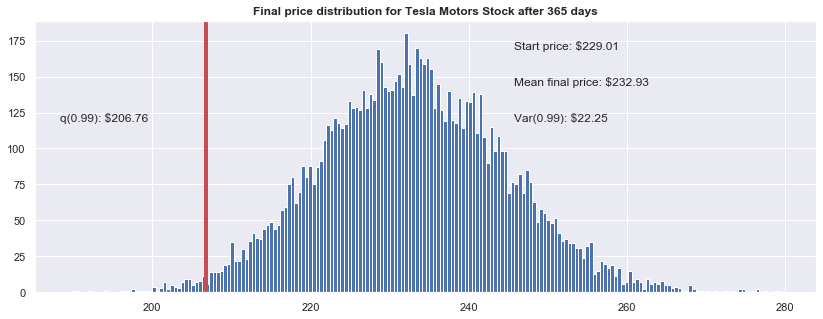

In [43]:
# Plotting the final Risk Analysis plot using Monte Carlo Simulation

plt.hist(simulations,bins=200)

plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "Var(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Tesla Motors Stock after %s days" % days, weight='bold');